In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True) # set seaborn plotting style
plt.rcParams['figure.figsize'] = [16, 4] # set the figure size for the plots
sample_size = 10000

# Uniform Distribution:

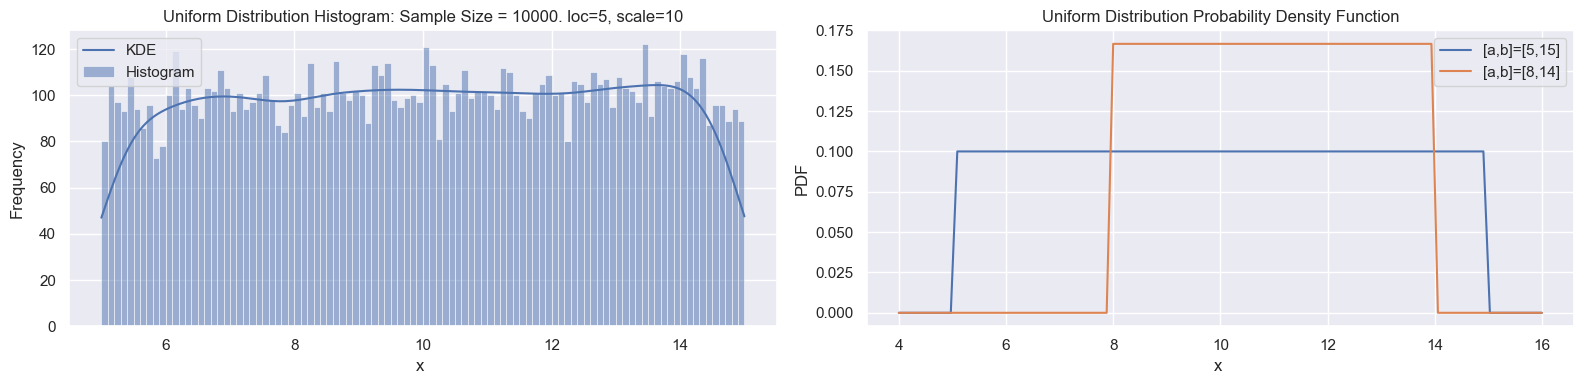

In [3]:
# import uniform distribution
from scipy.stats import uniform

# set parameters for a uniform distribution
param_loc = 5
param_scale = 10
# generate samples from this distribution
data_uniform = uniform.rvs(size=sample_size, loc=param_loc, scale=param_scale)

# plot a historgram of the output
plt.subplot(1, 2, 1) # layout to make 1 row, 2 columns of plots, and create to location 1.
ax1 = sns.histplot(data=data_uniform, bins=100, kde=True);
ax1.set(xlabel='x ', ylabel='Frequency', 
       title=f'Uniform Distribution Histogram: Sample Size = {sample_size}. loc={param_loc}, scale={param_scale}');
ax1.legend(['KDE','Histogram']);

# plot the probability density function
ax2 = plt.subplot(1, 2, 2) # layout to make 1 row, 2 columns of plots, and create to location 2.
x = np.linspace(4, 16, 100) # generate a list of x-values
y1 = uniform.pdf(x, loc=param_loc, scale=param_scale) # compute the PDF at these x-values
ax2.plot(x,y1)
y2 = uniform.pdf(x, loc=8, scale=6) # compute the PDF at these x-values
ax2.plot(x,y2)
ax2.legend(['[a,b]=[5,15]','[a,b]=[8,14]'])
ax2.set(xlabel='x ', ylabel='PDF', 
       title=f'Uniform Distribution Probability Density Function');
plt.tight_layout()

In [4]:
# compute the uniform pdf at three data points:
x = np.asarray([3,8,10])
print(uniform.pdf(x, loc=param_loc, scale=param_scale))

[0.  0.1 0.1]


# Normal Distribution:

The pdf with mean = $\mu$ and standard deviation = $\sigma$ is:

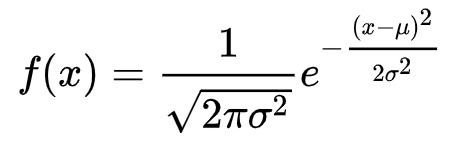

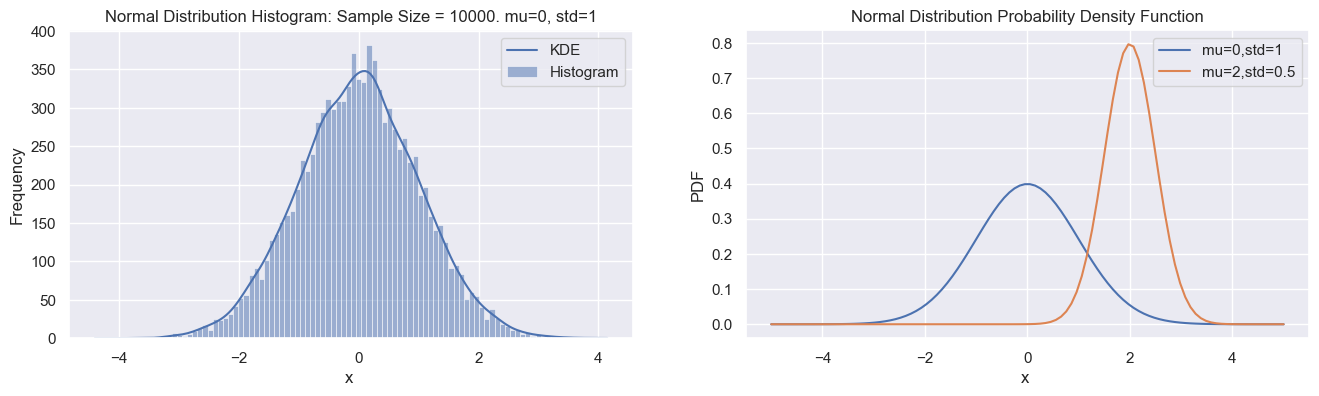

In [5]:
# import uniform distribution
from scipy.stats import norm

# set parameters for a uniform distribution
param_loc = 0
param_scale = 1
# generate samples from this distribution
data_normal = norm.rvs(size=sample_size, loc=param_loc, scale=param_scale)

# plot a historgram of the output
plt.subplot(1, 2, 1) # layout to make 1 row, 2 columns of plots, and create to location 1.
ax1 = sns.histplot(data=data_normal, bins=100, kde=True);
ax1.set(xlabel='x ', ylabel='Frequency', 
       title=f'Normal Distribution Histogram: Sample Size = {sample_size}. mu={param_loc}, std={param_scale}');
ax1.legend(['KDE','Histogram']);

# plot the probability density function
ax2 = plt.subplot(1, 2, 2) # layout to make 1 row, 2 columns of plots, and create to location 2.
x = np.linspace(-5, 5, 100) # generate a list of x-values
y1 = norm.pdf(x, loc=param_loc, scale=param_scale) # compute the PDF at these x-values
ax2.plot(x,y1)
y2 = norm.pdf(x, loc=2, scale=0.5) # compute the PDF at these x-values
ax2.plot(x,y2)
ax2.legend(['mu=0,std=1','mu=2,std=0.5'])
ax2.set(xlabel='x ', ylabel='PDF', 
       title=f'Normal Distribution Probability Density Function');

In [6]:
# compute the normal pdf at three data points:
x = np.asarray([-2,0,1])
print(norm.pdf(x, loc=param_loc, scale=param_scale))

[0.05399097 0.39894228 0.24197072]


# Chi-Squared Distribution

The pdf with k = the degrees of freedom (dof) is:

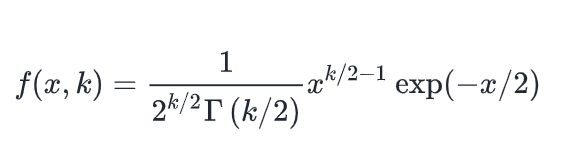

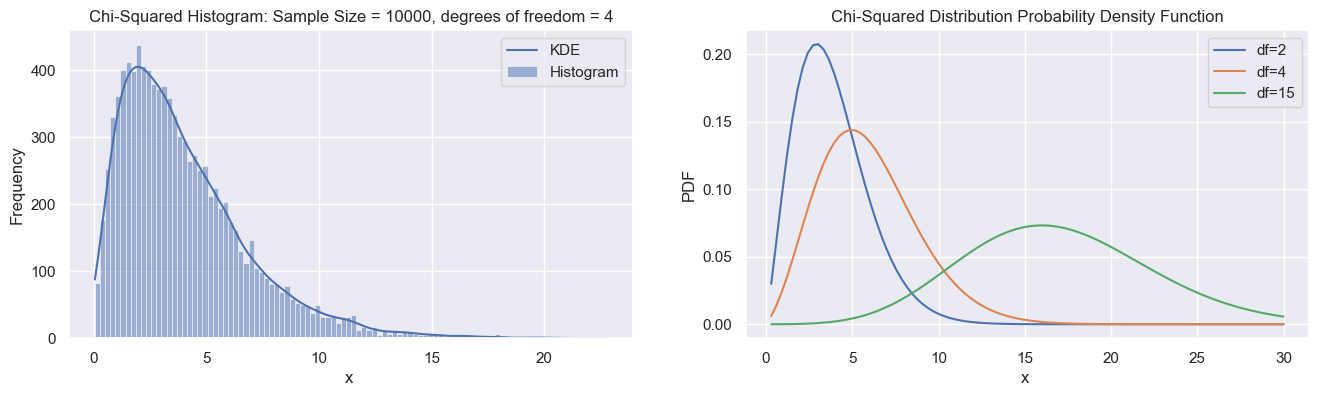

In [49]:
# import uniform distribution
from scipy.stats import chi2

# set parameters for a uniform distribution
df = 4 #
# generate samples from this distribution 
data_chi2 = chi2.rvs(df, size=sample_size)

# plot a historgram of the output
plt.subplot(1, 2, 1) # layout to make 1 row, 2 columns of plots, and create to location 1.
ax1 = sns.histplot(data=data_chi2, bins=100, kde=True);
ax1.set(xlabel='x ', ylabel='Frequency', 
       title=f'Chi-Squared Histogram: Sample Size = {sample_size}, degrees of freedom = {df}');
ax1.legend(['KDE','Histogram']);

# plot the probability density function
ax2 = plt.subplot(1, 2, 2) # layout to make 1 row, 2 columns of plots, and create to location 2.
x = np.linspace(0, 30, 100) # generate a list of x-values
y1 = chi2.pdf(2, x) # compute the PDF at these x-values
ax2.plot(x,y1, label='df=2')
y2 = chi2.pdf(4, x) # compute the PDF at these x-values
ax2.plot(x,y2, label='df=4')
y3 = chi2.pdf(15, x) # compute the PDF at these x-values
ax2.plot(x,y3, label='df=15')
ax2.legend()
ax2.set(xlabel='x ', ylabel='PDF', 
       title=f'Chi-Squared Distribution Probability Density Function');

probability of getting a value of 10 or more from a ch-squared distribution with df = 4 is 0.04042768199451279.
95% of the data in a chisquared distribution with df = 4 has a value less than 9.487729036781158.
 
probability of getting a value of 10 or more from a ch-squared distribution with df = 15 is 0.8197399195036015.
95% of the data in a chisquared distribution with df = 15 has a value less than 24.99579013972863.
 


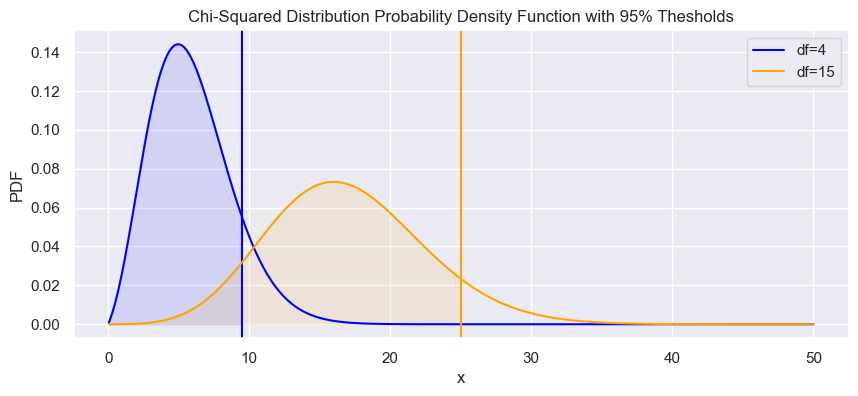

In [58]:
# p-value for a chi-squared distribution

# plot the probability density function
plt.figure(figsize=(10,4)) # layout to make 1 row, 2 columns of plots, and create to location 2.
x = np.linspace(0, 50, 1000) # generate a list of x-values

for df,c in zip([4, 15], ['blue','orange']):
    # probability of getting a value of 10 or more from a ch-squared distribution with df = 4
    p1 = chi2.sf(10, df)
    print(f'probability of getting a value of 10 or more from a ch-squared distribution with df = {df} is {p1}.')   
    # probability of getting a value of 10 or more from a ch-squared distribution with df = 4
    thresh = chi2.isf(0.05, df)
    print(f'95% of the data in a chisquared distribution with df = {df} has a value less than {thresh}.')
    y = chi2.pdf(df, x) # compute the PDF at these x-values
    plt.plot(x,y, color=c, label=f'df={df}')
    plt.axvline(thresh, color=c)
    max_idx = np.argmin(np.abs(x-thresh))
    plt.fill_between(x[:max_idx], y[:max_idx], 0, color=c, alpha=.1)
    print(' ')

plt.legend()
plt.xlabel('x')
plt.ylabel('PDF')
plt.title('Chi-Squared Distribution Probability Density Function with 95% Thesholds');

# t-Distribution:

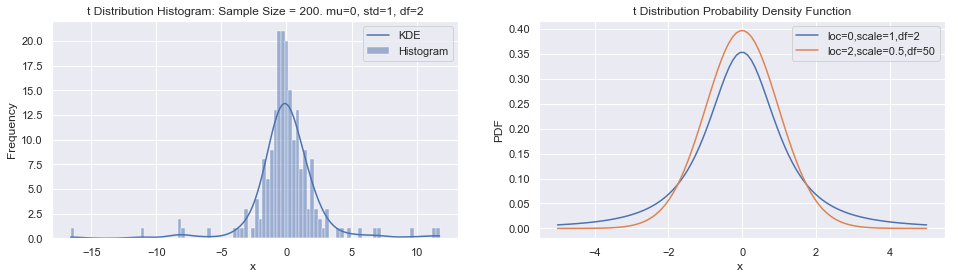

In [37]:
from scipy.stats import t

# set parameters for a uniform distribution
param_loc = 0
param_scale = 1
param_df = 2
# generate samples from this distribution
data_tDist = t.rvs(size=200, loc=param_loc, scale=param_scale, df=param_df)

# plot a historgram of the output
plt.subplot(1, 2, 1) # layout to make 1 row, 2 columns of plots, and create to location 1.
ax1 = sns.histplot(data=data_tDist, bins=100, kde=True);
ax1.set(xlabel='x ', ylabel='Frequency', 
       title=f't Distribution Histogram: Sample Size = {200}. mu={param_loc}, std={param_scale}, df={param_df}');
ax1.legend(['KDE','Histogram']);

# plot the probability density function
ax2 = plt.subplot(1, 2, 2) # layout to make 1 row, 2 columns of plots, and create to location 2.
x = np.linspace(-5, 5, 100) # generate a list of x-values
y1 = t.pdf(x, loc=param_loc, scale=param_scale, df=param_df) # compute the PDF at these x-values
ax2.plot(x,y1)
y2 = t.pdf(x, loc=param_loc, scale=param_scale, df=50) # compute the PDF at these x-values
ax2.plot(x,y2)
ax2.legend(['loc=0,scale=1,df=2','loc=2,scale=0.5,df=50'])
ax2.set(xlabel='x ', ylabel='PDF', 
       title=f't Distribution Probability Density Function');

In [25]:
# compute the normal pdf at three data points:
x = np.asarray([-2,0,20])
print(t.pdf(x, loc=param_loc, scale=param_scale, df=param_df))

[6.80413817e-02 3.53553391e-01 1.24068325e-04]


# Bernouli Distribution:

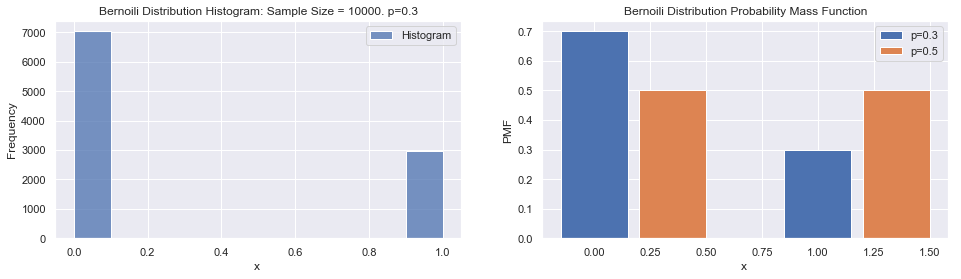

In [26]:
# import uniform distribution
from scipy.stats import bernoulli

# set parameters for a uniform distribution
param_p = 0.3
# generate samples from this distribution
data_bern = bernoulli.rvs(size=sample_size,p=param_p)

# plot a historgram of the output
plt.subplot(1, 2, 1) # layout to make 1 row, 2 columns of plots, and create to location 1.
ax1 = sns.histplot(data=data_bern, bins=10, kde=False);
ax1.set(xlabel='x ', ylabel='Frequency', 
       title=f'Bernoili Distribution Histogram: Sample Size = {sample_size}. p={param_p}');
ax1.legend(['Histogram']);

# plot the probability density function
ax2 = plt.subplot(1, 2, 2) # layout to make 1 row, 2 columns of plots, and create to location 2.
x = np.asarray([0,1])# generate a list of x-values
y1 = bernoulli.pmf(x, p=param_p) # compute the PDF at these x-values
ax2.bar(x,y1, width =0.3)
y2 = bernoulli.pmf(x, p=0.5) # compute the PDF at these x-values
ax2.bar(x+0.35,y2, width =0.3)
ax2.legend(['p=0.3','p=0.5'])
ax2.set(xlabel='x ', ylabel='PMF', 
       title=f'Bernoili Distribution Probability Mass Function');

# Binomial Distribution:

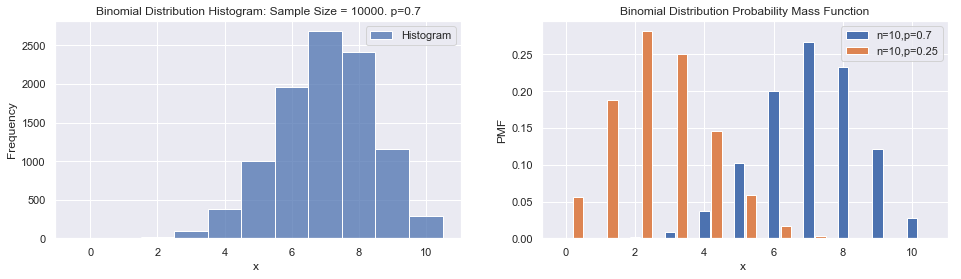

In [27]:
from scipy.stats import binom

# Generate Binomial Data
param_n = 10
param_p = 0.7
data_binom = binom.rvs(size=sample_size, n=param_n,p=param_p)

# plot a historgram of the output
plt.subplot(1, 2, 1) # layout to make 1 row, 2 columns of plots, and create to location 1.
ax1 = sns.histplot(data=data_binom, bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5], kde=False);
ax1.set(xlabel='x ', ylabel='Frequency', 
       title=f'Binomial Distribution Histogram: Sample Size = {sample_size}. p={param_p}');
ax1.legend(['Histogram']);

# plot the probability density function
ax2 = plt.subplot(1, 2, 2) # layout to make 1 row, 2 columns of plots, and create to location 2.
x = np.asarray([0,1,2,3,4,5,6,7,8,9,10])# generate a list of x-values
y1 = binom.pmf(x, n=param_n,p=param_p) # compute the PDF at these x-values
ax2.bar(x,y1, width =0.3)
y2 = binom.pmf(x, n=param_n,p=0.25) # compute the PDF at these x-values
ax2.bar(x+0.35,y2, width =0.3)
ax2.legend(['n=10,p=0.7','n=10,p=0.25'])
ax2.set(xlabel='x ', ylabel='PMF', 
       title=f'Binomial Distribution Probability Mass Function');

In [28]:
# compute the binomial pmf at three data points:
x = np.asarray([0,1,5,7,8,9])
print(binom.pmf(x, n=param_n, p=param_p))

[5.90490000e-06 1.37781000e-04 1.02919345e-01 2.66827932e-01
 2.33474440e-01 1.21060821e-01]


# Poisson Distribution:

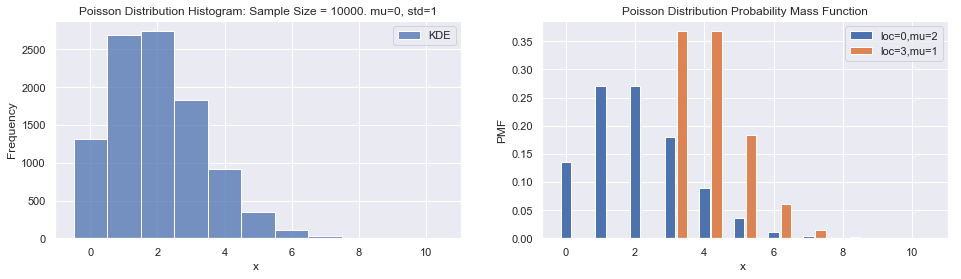

In [29]:
# import uniform distribution
from scipy.stats import poisson

# set parameters for a uniform distribution
param_mu = 2
param_loc = 0
# generate samples from this distribution
data_poisson = poisson.rvs(size=sample_size, loc=param_loc, mu=param_mu)

# plot a historgram of the output
plt.subplot(1, 2, 1) # layout to make 1 row, 2 columns of plots, and create to location 1.
ax1 = sns.histplot(data=data_poisson, bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5], kde=False);
ax1.set(xlabel='x ', ylabel='Frequency', 
       title=f'Poisson Distribution Histogram: Sample Size = {sample_size}. mu={param_loc}, std={param_scale}');
ax1.legend(['KDE','Histogram']);

# plot the probability density function
ax2 = plt.subplot(1, 2, 2) # layout to make 1 row, 2 columns of plots, and create to location 2.
x = np.asarray([0,1,2,3,4,5,6,7,8,9,10])# generate a list of x-values
y1 = poisson.pmf(x, loc=param_loc, mu=param_mu) # compute the PDF at these x-values
ax2.bar(x,y1, width =0.3)
y2 = poisson.pmf(x, loc=3, mu=1) # compute the PDF at these x-values
ax2.bar(x+0.35,y2, width =0.3)
ax2.legend(['loc=0,mu=2','loc=3,mu=1'])
ax2.set(xlabel='x ', ylabel='PMF', 
       title=f'Poisson Distribution Probability Mass Function');

In [30]:
# compute the binomial pmf at three data points:
x = np.asarray([0,1,5,7,8,9])
print(poisson.pmf(x, loc=param_loc, mu=param_mu))

[1.35335283e-01 2.70670566e-01 3.60894089e-02 3.43708656e-03
 8.59271640e-04 1.90949253e-04]


# Beta Distribution:

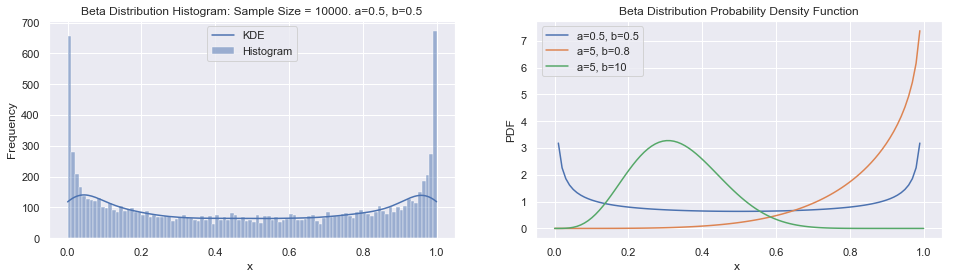

In [31]:
from scipy.stats import beta

# Generate Poisson Data
param_a = .5
param_b = .5
data_beta = beta.rvs(a=param_a, b=param_b, size=sample_size)

# plot a historgram of the output
plt.subplot(1, 2, 1) # layout to make 1 row, 2 columns of plots, and create to location 1.
ax1 = sns.histplot(data=data_beta, bins=100, kde=True);
ax1.set(xlabel='x ', ylabel='Frequency', 
       title=f'Beta Distribution Histogram: Sample Size = {sample_size}. a={param_a}, b={param_b}');
ax1.legend(['KDE','Histogram']);

# plot the probability density function
ax2 = plt.subplot(1, 2, 2) # layout to make 1 row, 2 columns of plots, and create to location 2.
x = np.linspace(0, 1, 100) # generate a list of x-values
y1 = beta.pdf(x, a=param_a, b=param_b) # compute the PDF at these x-values
ax2.plot(x,y1)
y2 = beta.pdf(x, a=5, b=0.8) # compute the PDF at these x-values
ax2.plot(x,y2)
y3 = beta.pdf(x, a=5, b=10) # compute the PDF at these x-values
ax2.plot(x,y3)
ax2.legend(['a=0.5, b=0.5','a=5, b=0.8','a=5, b=10'])
ax2.set(xlabel='x ', ylabel='PDF', 
       title=f'Beta Distribution Probability Density Function');

In [32]:
# compute the beta pdf at three data points:
x = np.asarray([0,1,5,7,8,9])
print(binom.pmf(x, n=param_n, p=param_p))

[5.90490000e-06 1.37781000e-04 1.02919345e-01 2.66827932e-01
 2.33474440e-01 1.21060821e-01]


# Gamma Distribution:

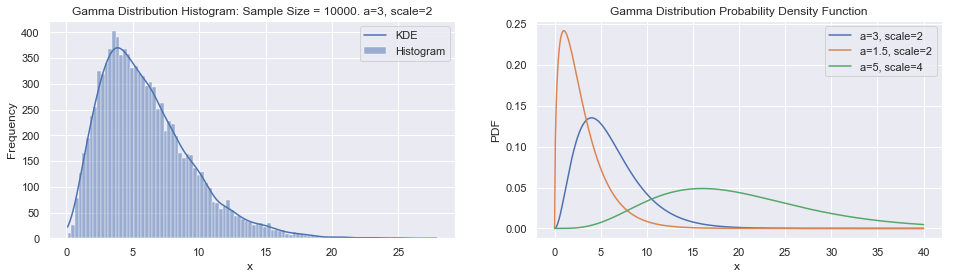

In [33]:
from scipy.stats import gamma

# Generate Gamma Data
param_a = 3 # shape parameter, sometimes denoted k or alpha
param_scale = 2 # this is the scale parameter theta.  Sometime this is given as rate parameter called beta, where theta=1/beta.
data_gamma = gamma.rvs(size=sample_size, a=param_a, scale=param_scale)

# plot a historgram of the output
plt.subplot(1, 2, 1) # layout to make 1 row, 2 columns of plots, and create to location 1.
ax1 = sns.histplot(data=data_gamma, bins=100, kde=True);
ax1.set(xlabel='x ', ylabel='Frequency', 
       title=f'Gamma Distribution Histogram: Sample Size = {sample_size}. a={param_a}, scale={param_scale}');
ax1.legend(['KDE','Histogram']);

# plot the probability density function
ax2 = plt.subplot(1, 2, 2) # layout to make 1 row, 2 columns of plots, and create to location 2.
x = np.linspace(0, 40, 500) # generate a list of x-values
y1 = gamma.pdf(x, a=param_a, scale=param_scale) # compute the PDF at these x-values
ax2.plot(x,y1)
y2 = gamma.pdf(x, a=1.5, scale=2) # compute the PDF at these x-values
ax2.plot(x,y2)
y3 = gamma.pdf(x, a=5, scale=4) # compute the PDF at these x-values
ax2.plot(x,y3)
ax2.legend(['a=3, scale=2','a=1.5, scale=2','a=5, scale=4'])
ax2.set(xlabel='x ', ylabel='PDF', 
       title=f'Gamma Distribution Probability Density Function');

In [34]:
# compute the beta pdf at three data points:
x = np.asarray([0,1,5,10,15])
print(gamma.pdf(x, a=param_a, scale=param_scale))

[0.         0.03790817 0.12825781 0.04211217 0.00777775]


# Central Limit Theorem Demonstration

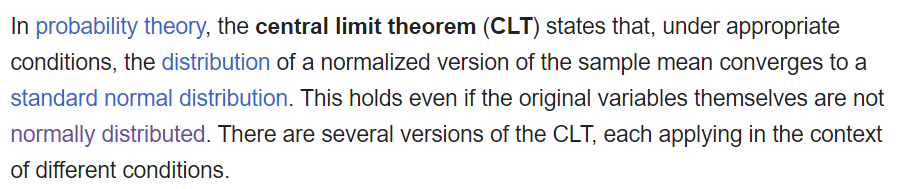

Modelling 100 rolls each of 15 dice.


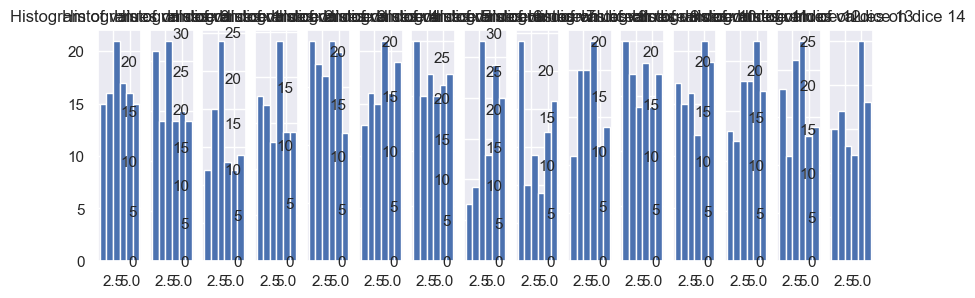

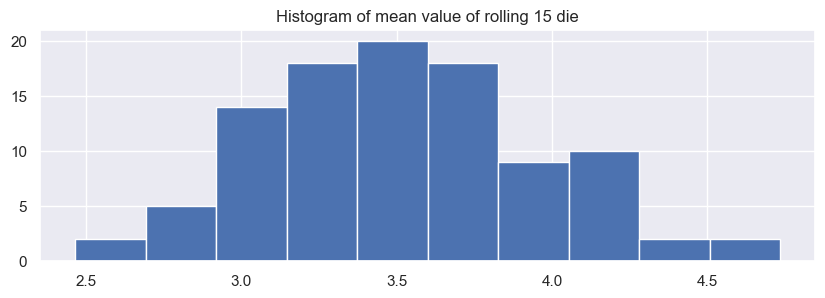

In [108]:
N = 15 # number of dice
num_rolls = 100 # number of times to roll each die
print(f'Modelling {num_rolls} rolls each of {N} dice.')

# import uniform distribution
from numpy.random import randint

# generate samples from this distribution 
die_roll_values = np.zeros((N,num_rolls))
plt.figure(figsize=(10,3))
for i in range(N):
       plt.subplot(1, N, i+1)
       data_one_die = randint(size=num_rolls, low=1, high=7)
       plt.hist(x=data_one_die, bins=[0.5,1.5,2.5,3.5,4.5,5.5,6.5]);
       plt.title(f'Histogram of values on dice {i}')
       die_roll_values[i,:] = data_one_die

means = np.mean(die_roll_values, axis=0)
plt.figure(figsize=(10,3))
plt.hist(x=means)
plt.title(f'Histogram of mean value of rolling {N} die');